<a href="https://colab.research.google.com/github/Carlos19033/IA-003-2025/blob/main/IA-003-2025/Assignments/Assignment_4_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROCESSING DATASETS IN PYTHON**

CLASS: Artificial Intelligence

GROUP: 003

HOUR: N1

TEAM:

- CARLOS ALBERTO SAUCEDO RIOS              1968121
- MARIANGELES SOFIA RODRIGUEZ UZCATEGUI    2132315
- AMANDA GUADALUPE BUSTOS BANDA            2052995

1- Import Libraries

In [2]:
from sklearn.datasets import load_breast_cancer  # Imports the built-in Breast Cancer dataset from scikit-learn
import matplotlib.pyplot as plt  # Imports the library used to create graphs
from sklearn.model_selection import train_test_split  # Imports the function to split the dataset into training and testing sets
from sklearn.tree import DecisionTreeClassifier  # Imports the decision tree classifier model
from sklearn.metrics import accuracy_score, classification_report  # Imports metrics to evaluate model performance
from sklearn import tree  # Imports the tree module for visualization

2- Load data

In [3]:
analysis = load_breast_cancer()  # Loads the Breast Cancer Wisconsin dataset
X = analysis.data  # Assigns the dataset features (numerical values of each sample) to variable X
y = analysis.target  # Assigns the labels (0 = malignant, 1 = benign) to variable y
print(analysis.target_names, "\n")  # Prints the class names
print(analysis.feature_names, "\n")  # Prints the names of the analyzed features

['malignant' 'benign'] 

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 



 3- Preprocessing


At this stage, the dataset is divided into two parts: training and testing.
The training set is used for the model to learn patterns from known examples,
while the testing set is reserved to evaluate whether the model can generalize
to data it has never seen before.


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Splits data: 80% training and 20% testing

4- Select and train the model.

The fit() method adjusts the decision tree model to the training data.
During this process, the algorithm searches for the splits that best separate the classes (benign/malignant)
based on a purity criterion such as the Gini index or entropy.

In [5]:
clf = DecisionTreeClassifier()  # Creates an instance of the decision tree model
clf.fit(X_train, y_train)  # Trains the model with the training data

DecisionTreeClassifier()

The score() method evaluates the model’s accuracy, which is the proportion of correct predictions.
Accuracy means how often the model’s predictions match the real data.
A value close to 1 indicates that the model classifies most examples correctly.

In [6]:
train_accuracy = clf.score(X_train, y_train)  # Calculates model accuracy on training data
print(train_accuracy)  # Prints the accuracy on the console

1.0


5- Test the model

Here the model makes predictions on the testing set,
using the knowledge acquired during training.
Each output corresponds to the diagnosis the model estimates for a new patient.

In [7]:
y_pred = clf.predict(X_test)  # Generates predictions for the testing data

This block prints comparisons between the real and predicted labels every 5 samples.
It helps observe, in a direct way, how consistent the model’s responses are.

In [8]:
for i in range(0, len(y_pred), 5):  # Iterates through predictions every 5 samples
    print(f"Predicted: {y_pred[i]}, Real: {y_test[i]}")  # Displays predicted and actual values

Predicted: 1, Real: 1
Predicted: 0, Real: 0
Predicted: 1, Real: 1
Predicted: 0, Real: 0
Predicted: 1, Real: 0
Predicted: 1, Real: 1
Predicted: 1, Real: 1
Predicted: 1, Real: 1
Predicted: 1, Real: 1
Predicted: 1, Real: 1
Predicted: 0, Real: 0
Predicted: 1, Real: 1
Predicted: 1, Real: 1
Predicted: 1, Real: 1
Predicted: 0, Real: 0
Predicted: 1, Real: 1
Predicted: 0, Real: 0
Predicted: 0, Real: 0
Predicted: 1, Real: 1
Predicted: 1, Real: 1
Predicted: 0, Real: 0
Predicted: 1, Real: 1
Predicted: 0, Real: 0


The accuracy_score() function measures the overall proportion of correct predictions.
The classification_report() provides several useful metrics to analyze the model's performance:
- **Precision**: represents the number of true positives among all true and false positives.
  It shows how reliable the model’s positive predictions are.
- **Recall or sensitivity**: represents the true positives among all the cases that were actually positive.
  It shows how well the model finds all real cases of a given class.
- **F1-score**: combines precision and recall into a single balanced measure.
These metrics are calculated by comparing the model’s predicted results with the actual values,
helping to understand whether the model makes more errors by excess (false positives)
or by omission (false negatives).

In [9]:
accuracy = accuracy_score(y_test, y_pred)  # Calculates the model's overall accuracy on the testing set
print("Accuracy:", accuracy)  # Prints the accuracy in the console
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=analysis.target_names))  # Displays class metrics

Accuracy: 0.9385964912280702
Classification Report:
               precision    recall  f1-score   support

   malignant       0.93      0.91      0.92        43
      benign       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



The **Gini index** measures how mixed the classes are within a group of data.
If a group contains only one class, it is considered completely pure (Gini = 0).
The decision tree evaluates all features and selects the one
that best separates the classes (leaving purer groups).
This process repeats at each level until no further improvement can be made,
forming the final branches of the tree.

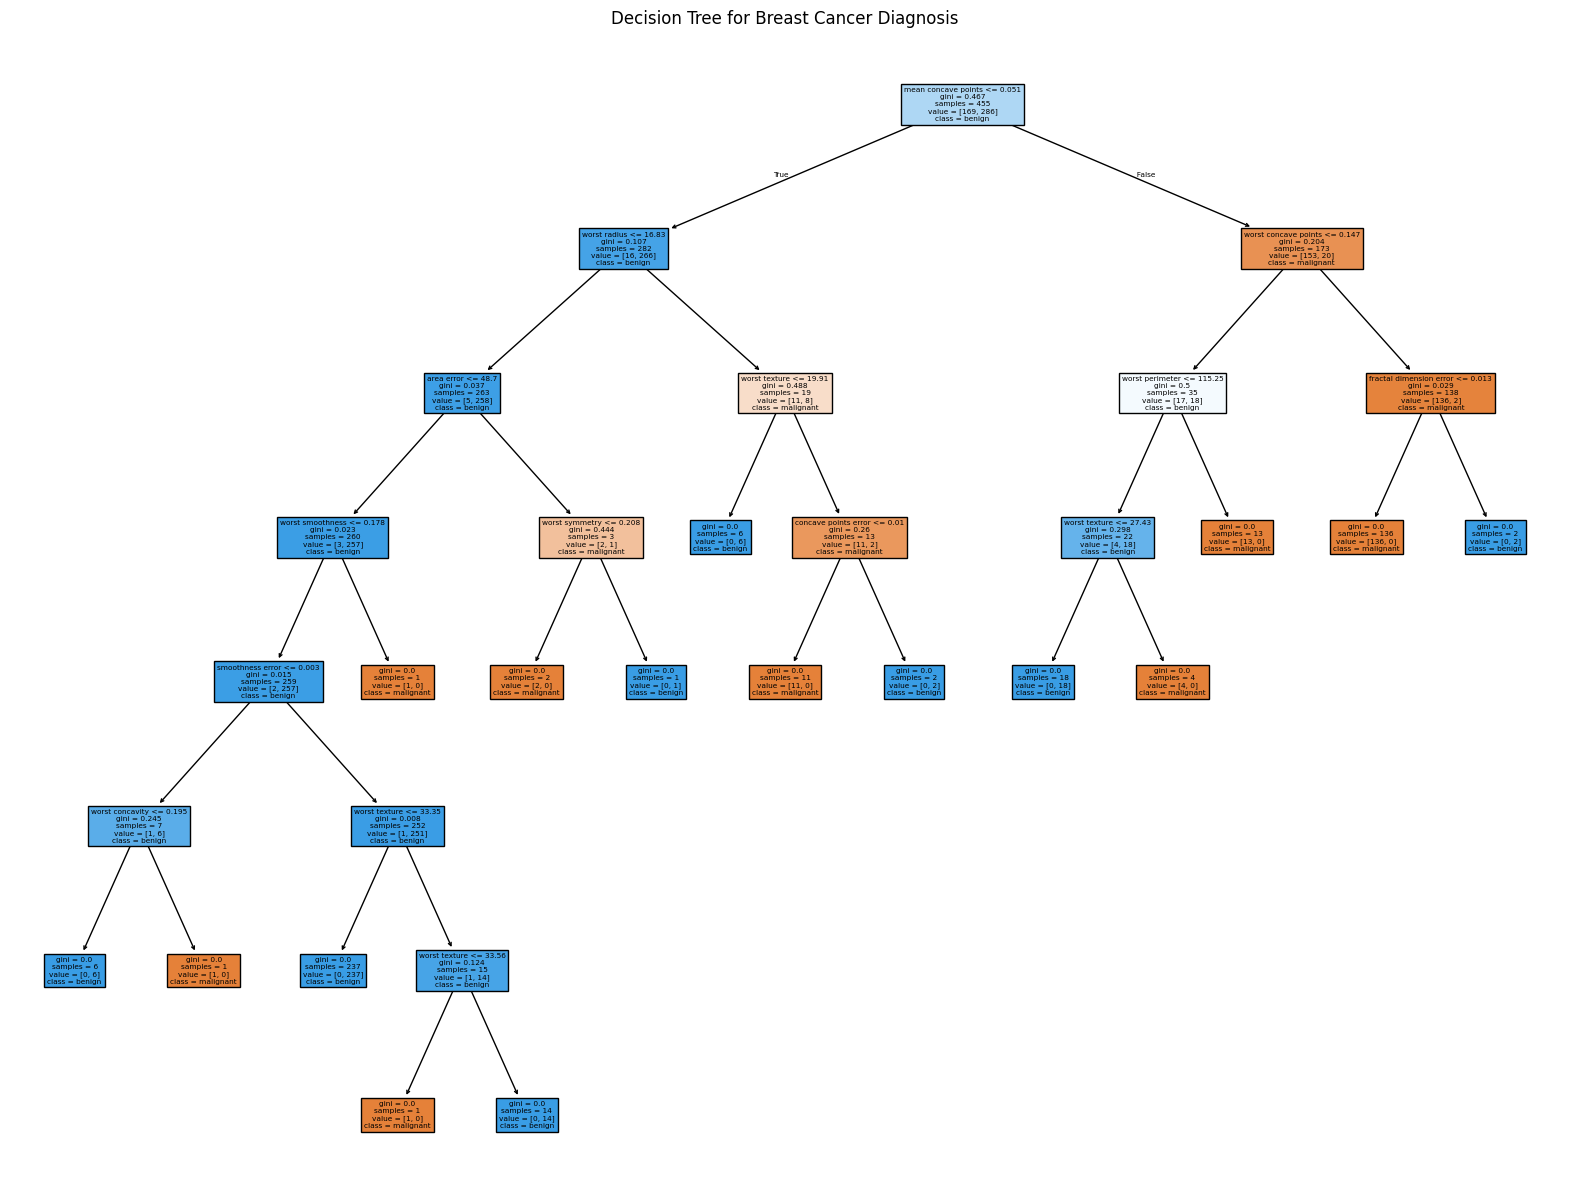

In [10]:
plt.figure(figsize=(20, 15))  # Defines the figure size for visualizing the tree
tree.plot_tree(clf, filled=True, feature_names=analysis.feature_names, class_names=analysis.target_names)  # Draws the tree with colors and labels
plt.title("Decision Tree for Breast Cancer Diagnosis")  # Adds a title to the graph
plt.savefig("decision_tree.png", dpi=300)  # Saves the tree image in high resolution
plt.show()  # Displays the graph on screen